# 딕셔너리와 집합
## dict와 set의 내부 구조


### 성능 실험

>dict의 성능을 측정하기 위해서 dict.fromkeys()를 사용해서 1천 개의 실수를 담은 haystack이라는 dict 객체를 생성하여 데이터를 준비한 후 에는 timeit모듈을 이용한다.



In [1]:
#haystack에서 needles를 검색하고 발견된 횟수를 계산
found = 0
for n in needles:
    if n in haystack:
        found +=1

NameError: name 'needles' is not defined

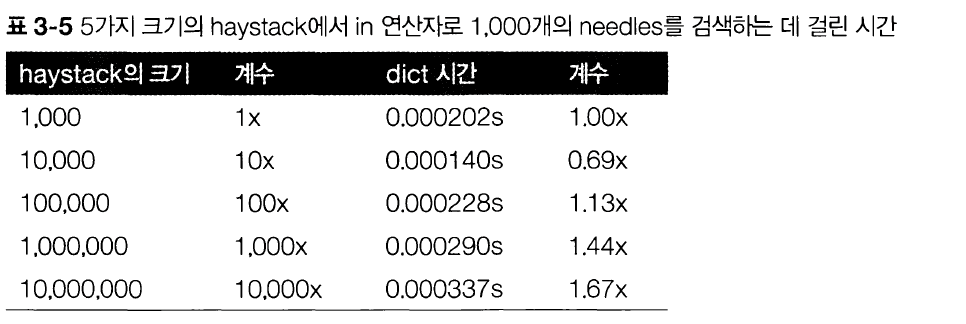


In [2]:
#교집합 연산을 이용해서 haystack 안에 needles가 발생한 횟수 구하기
found = len(needles & haystack)

NameError: name 'needles' is not defined

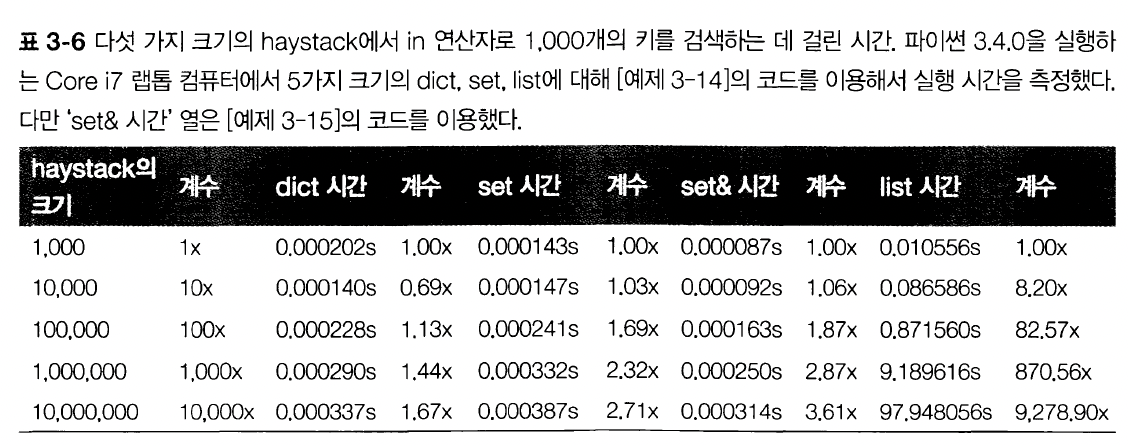

## 3.9.2 딕셔너리 안의 해시 테이블

해시 테이블은 희소 배열로 데이터 구조 교과서를 보면 해시 테이블 안에 있는 항목을 종종 버킷이라고 하기에 dict 해시 테이블에는 각 항목별로 버킷이 있고, 버킷에는 키에 대한 참조와 항목의 값에 대한 참조가 들어갑니다.

그리고, 모든 버킷의 크기가 동일하므로 오프셋을 계산해서 각 버킷에 바로 접근할 수 있다.

참고로, 파이썬은 버킷의 1/3 이상을 비워두기 위해서 해시 테이블 항목이 많아지면 더 넓은 공간에 복사해서 버킷의 공간을 확보하고, 해시 테이블 안에 항목을 넣을 시 먼저 항목키의 해쉬값을 계산하고, 이따 해시 hash() 내장 함수 이용해서 계산한다.

<br>

### 해시와 동치성

>hash() 내장 함수는 내장 잘료형은 직접 처리하고 사용자 정의 자료형의 경우 __hash__() 메서드를 호출하고, 두 객체가 동일할 경우 이 값들의 해시값더 동일해야 한다. <br> 그렇지 않을 경우, 햐시 테이블 알고리즘이 작동되지 않는다

게다가, 해시 테이블 인덱스처럼 효율성을 높이려면 해시값이 가능한 한 인덱스 공간에서 골고루 퍼져있어야합니다.(동일하지 않은 객체들의 해시값은 상당히 달라야한다.
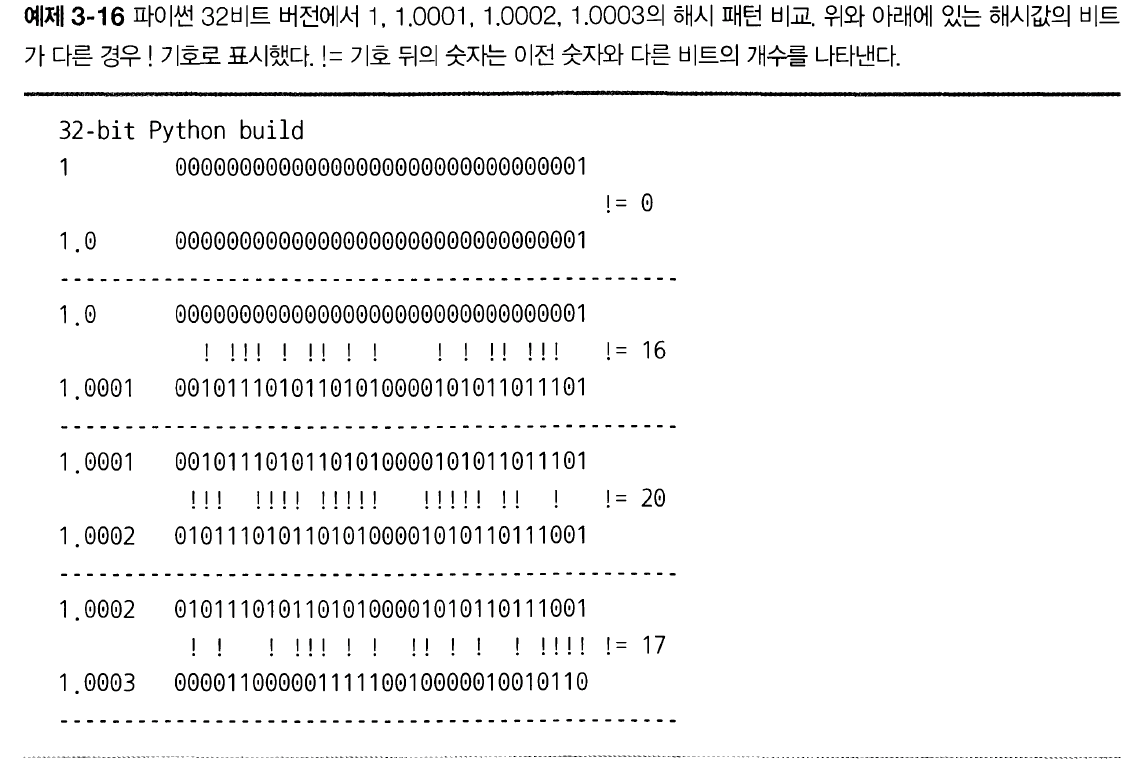


<br>

### 해시 테이블알고리즘

my_diet[search_key] 에서 값을 가져오기 위해 파이썬은 __ hash _ (search_key )를 호출해서 search_key 의 해시값을 가져오고, 해시값의 최하위 비트를 해시 테이블 안
의 버킷에 대한 오프셋으로 사용한다(서용하는 비트 수는 현재 테이블 크기에 따라 달라진다).

비어 있으면 KeyError를 발생시키고. 그렇지 않으면 버킷에 들어 있는 항목인 (found_key : found_value ) 쌍을 검사해서 search_key == found_key 인지 검
사한다. 이 값이 일치하면 항목을 찾은 것이므로 found_value를 반환한다.

그렇지만 search_key와 found_key가 다른 경우에는 해시 충돌恥h mllision 이 발생한 것이다. 해시 충돌은 해시 힘수가 임의의 객체를 적은 수의 비트로 매핑하기 때문에 발생한다. 해시 충돌을 해결하기 위해 알고리즘은 해시의 다른 비트들을 가져와서 특정한 방식으로 조작한 후 그 결괴를 이용해서 다른 버킷을 조회한다? 이때 버킷이 비어 있으면 KeyError를 발생시킨다.


그렇지 않고 키가 일치하면 항목 값을 반환하고, 키가 일치하지 않으 다시 충돌면 해결 프로세
스를 반복한다. 이 알고리즘을 다이어그램으로 표현한다





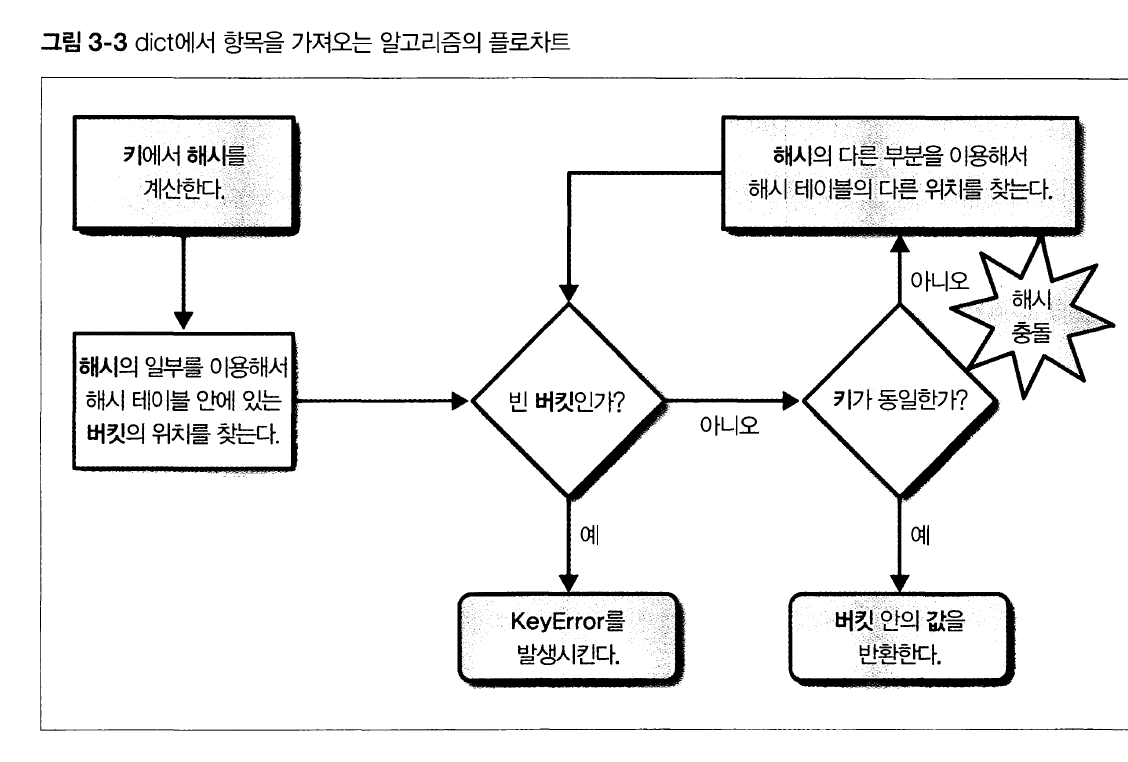

>항목을 추가하거나 갱신하는 과정도 동일하고, 빈 버킷응 찾으면 새로운 헝목을 추가하여 동일한 키를 가진 버킷을 버킷의 값을 새로운 값을 생성한다.

## dict 작동 방식에 의한 영향

### 키 객체는 반드시 해시 가능해야 한다

1. 객체의 수명 주기 동안 언제나 동일한 값을 반환하는 __hash__()메서드를 제공해서 hash() 함수를 지원한다.

2. __eq__() 메서드를 통해서 동치성을 판단할 수 있다.

3. a==b가 참이면, hash(a) == hash(b)

<br>

### dict의 메모리 오버헤드가 크다

dict가 내부적으로 해시 테이블을 사용하고 있고 해시가 제대로 작동하려면 빈 공간이 충분해야 하기에, dict의 메모리 공간 효율성은 높지 않다.

그러므로, JSON 형태로 각 레코드에 하나의 dict를 할당해서 딕셔너리의 리스트를 사용하는 것보다 튜플이나 명명된 튜플의 리스트에 저장하는 것이 좋다.

dict를 튜플로 교체하면, 레코드마다 하나의 해시 테이블을 가져야 하는 부담과 레코드마다 필드명을 다시 저장해야 하는 부담을 제거함으로써 메모리 사용량을 줄일 수 있다.

사용자 정의 자료형의 경우 __slots__ 클래스 속성을 이용해서 객체 속성 저장소를 dict에서 튜플로 변경할 수 있다.






### 키 검색이 아주 빠르다

dict는 속도를 위해 공간을 포기하는 예로 딕셔너리는 메모리 오버헤드가 상당히 크지만, 메모리에 로딩되는 한 딕셔너리 크기와 무관하게 빠른 접근 속도를 제공합니다.

dict의 크기를 1,000에서 10,000,000 요소로 증가시켰을 때, 검색 시간은 2.8배 증가했지만 몇 천만 개를 1초도 걸리지 않는다.

### 키 순서는 삽입 순서에 따라 달라진다


해시 충돌이 발생한다면 두 번째 키는 충돌이 발생하지 않을 때의 정상적인 위치와 다른 곳에 놓이게 되기에 dict([(key1,value1), (key2,value2)])로 생성한 딕셔너리와  dict([(key1,value1), (key2,value2)])으로 생성한 딕셔너리 동일하다.


그러나, key1과 key2의 해시가 충돌하면 키의 순서는 달라진다

In [6]:
# 인구 10 대 국가의 국제전화 코드
DIAL_CODES = [
(86, ' China ' ) ,
(91, 'India'),
( 1 , ' United States ' ) ,
(62, ' Indonesia ' ) ,
(55, 'Brazil' ),
(92, 'Pakistan'),
(880, 'Bangladesh' ),
(234, 'Nigeria' ),
(7, ' Russia'),
(81, 'Japan'),]
d1 = dict(DIAL_CODES) 
print( 'd1 : ' , d1 .keys())
d2 = dict(sorted(DIAL_CODES) ) 
print( ' d2: ' , d2 . keys() )
d3 = dict(sorted(DIAL_CODES, key=lambda x:x[1])) 
print( ' d3: ' , d3 . keys() )
assert d1 == d2 and d2 == d3 

d1 :  dict_keys([86, 91, 1, 62, 55, 92, 880, 234, 7, 81])
 d2:  dict_keys([1, 7, 55, 62, 81, 86, 91, 92, 234, 880])
 d3:  dict_keys([86, 62, 7, 1, 880, 55, 91, 81, 234, 92])


### 딕셔너리에 항목을 추가하면 기존 키의 순서가 변경될 수 있다

1. 처음부터 끝까지 딕셔너리를 검색하면서 필요한 항목은 별도의 딕셔너리에 추가한다.
2.  별도의 딕셔너리로 원래 딕셔너리를 갱신한다.

## 집합의 작동 방식 - 현실적으로 미치는 영향

set과 frozenset도 해시 테이불을 이용해서 구현하지만, 각 버킷이 항목에 대한 참조만을 담
고 있다는 점이 다르다(항목 자체가 diet 에서의 키처럼 사용되지만. 이 키를 통해 접근할 값이
없다)． 사실 set 이 파이썬 언어에 추가되기 전까지는 가짜 값을 가진 딕셔너리를 사용해서 키
가 들어 있는지 빠르게 검색하곤 했다.
3.9.3 절 ‘diet 작동 방식에 의한 영향에서 설명한 기반 해시 테이블이 diet 의 작동을 결정하는
방식이 집합에도 모두 적용되므로. 이미 설명한 내용을 반복할 필요 없이. set 에 대한 설명을
다음과같이 간단히 정리할수있다.

